# Simulations

Here I am simulating some square waves

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.fft import fft, fft2,fftshift, fftfreq

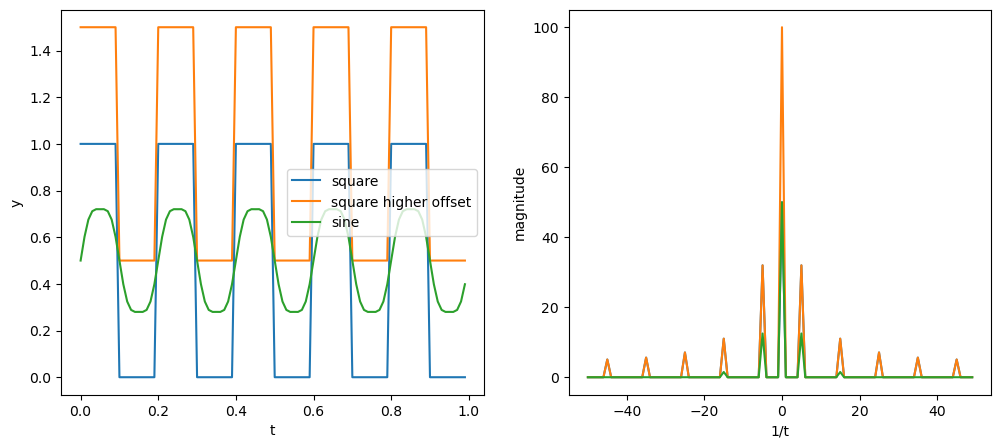

In [3]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
N_points = 100
t = np.linspace(0, 1, N_points, endpoint=False)

# Plot idealised original grating function
wave = 0.5*sp.signal.square(2*np.pi* 5 * t) + 0.5
wave_2 = 0.5*sp.signal.square(2*np.pi* 5 * t) + 1

# Add realistic 'modulated' function
sine_wave = 0.25* np.sin(2*np.pi* 5 * t) + 0.03* np.sin(6*np.pi* 5 * t) +0.5
ax[0].plot(t, wave, label='square')
ax[0].plot(t, wave_2, label='square higher offset')
ax[0].plot(t, sine_wave, label='sine')
ax[0].set_ylabel('y')
ax[0].set_xlabel('t')
ax[0].legend()

# Undergo Fourier transforms
# Plot absolute value (to get MTF)
fft_frequencies = fftshift(fftfreq(len(t), d=1/N_points))
ax[1].plot(fft_frequencies,fftshift(np.abs(fft(wave))))
ax[1].plot(fft_frequencies,fftshift(np.abs(fft(wave_2))))
ax[1].plot(fft_frequencies,fftshift(np.abs(fft(sine_wave))))
ax[1].set_xlabel('1/t')
ax[1].set_ylabel('magnitude')
plt.show()

# DOF Model

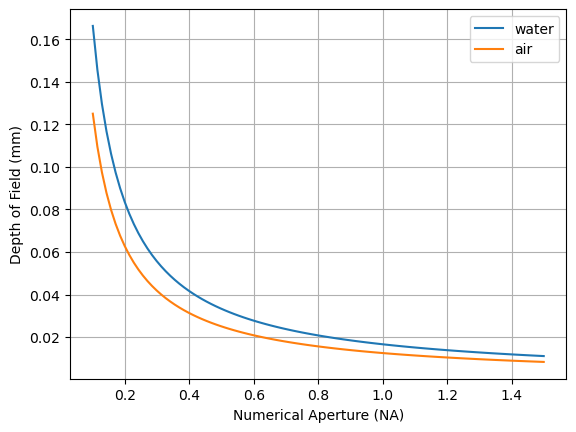

In [20]:
def dof(NA, lamb, M, n_bath, e):
    pixel = e/ (M*NA)
    diff = lamb / (NA*NA) * 0
    return n_bath * (pixel + diff)

NA = np.linspace(0.1, 1.5, 100)
plt.plot(NA, dof(NA, 500e-9, 0.5, 1.33,  6.25e-6)*1000, label='water')
plt.plot(NA, dof(NA, 500e-9, 0.5, 1,  6.25e-6)*1000, label='air')

plt.ylabel('Depth of Field (mm)')
plt.xlabel('Numerical Aperture (NA)')
plt.grid()
plt.legend()

Text(0.5, 1.0, 'Expected DOF variation with f-number (500 nm)')

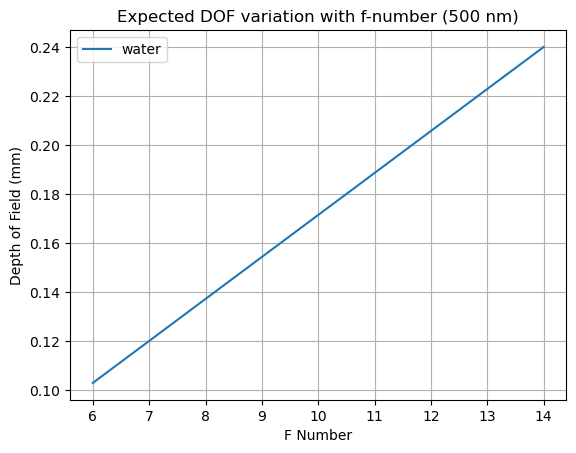

In [21]:
NA = np.linspace(0.02, 0.1, 100)
# f_num = np.array([  6.        ,   8.0326921 ,  11.02426219,  16.71845468,
#          25.92260749,  47.376144  , 105.44477882])
f_num = np.arange(6,15, 1)
NA = 1/(2*f_num)
pixel_size = 6.45e-6
plt.plot(f_num, dof(NA, 500e-9, 1, 1.33,  pixel_size)*1000, label='water')
#plt.plot(NA, dof(NA, 500e-9, 0.5, 1,  6.25e-6)*1000, label='air')

plt.ylabel('Depth of Field (mm)')
plt.xlabel('Numerical Aperture (NA)')
plt.xlabel('F Number')
plt.grid()
plt.legend()
plt.title('Expected DOF variation with f-number (500 nm)')

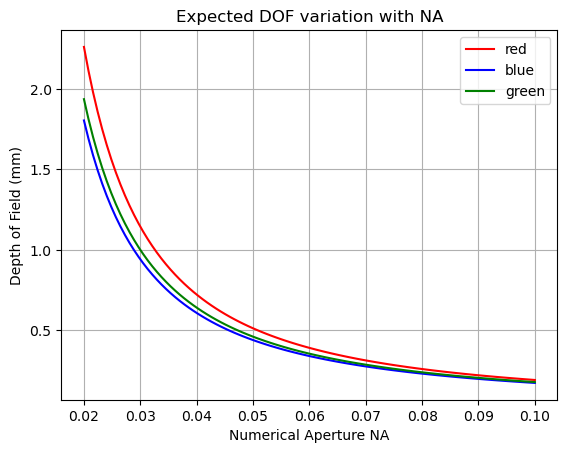

In [5]:
lambs = np.linspace(300, 800, 100)
plt.plot(NA, dof(NA, 655e-9, 0.5, 1,  6.25e-6)*1000, label='red', c='red')
plt.plot(NA, dof(NA, 472e-9, 0.5, 1,  6.25e-6)*1000, label='blue', c='blue')
plt.plot(NA, dof(NA, 525e-9, 0.5, 1,  6.25e-6)*1000, label='green', c='green')
plt.title('Expected DOF variation with NA')
plt.ylabel('Depth of Field (mm)')
plt.xlabel('Numerical Aperture NA')
plt.grid()
plt.legend()